# Problem 3.1b

In [532]:
import numpy as np
"""
This works because we can multiply by just the jth column.
By doing so we get the jth column of the multiplied matrix,
doing so again and again would return the jth column of A^t

ex
assuming we want i = 2 and j = 2 and t = 3 
and 
A = 
|1,2,3|
|4,5,6| 
|7,8,9| 

We can do this: 
|1,2,3|   |2|   |36 |
|4,5,6| * |5| = |81 |
|7,8,9|   |8|   |126|

We can see the jth column is [2,5,8]
And the resulting vector[26,81,126] is the jth column of A^2 
To get the third power we do the same thing but use the jth
column of the A^2 matrix (found in prior step)


|1,2,3|   |36 |   |576 |
|4,5,6| * |81 | = |1305|
|7,8,9|   |126|   |2034|

And to find [A^3]ij we can simply take the ith element and get
[A^3]ij = 1305

Doing this multiple times results in a time complexity of O(N^2) 
for the matrix-vector operation and O(t) for the exponent resulting in 
a overall timecomplexity of O(N^2t)

"""
n = 10
t = 10
i = np.random.randint(n)
j = np.random.randint(n) 

mat = np.random.randint(n, size=(n,n))
print(mat)
jth_col = mat[:, j]
for _ in range(t-1):
    buff = np.zeros((n, 1))
    for row_idx in range(n): 
        row = mat[row_idx, :]
        for r, c in zip(row, jth_col):
            buff[row_idx, 0] += r * c
    jth_col = np.copy(buff)
a_ij = jth_col[i][0]
print(a_ij)

[[6 6 5 5 6 7 5 8 0 4]
 [7 9 6 8 0 6 9 9 7 5]
 [3 4 1 6 6 4 0 7 0 1]
 [2 3 3 4 5 7 3 9 4 9]
 [6 6 5 7 9 6 7 3 2 4]
 [5 4 3 8 5 9 6 7 2 2]
 [0 2 7 9 9 8 0 2 9 1]
 [7 0 9 3 1 7 1 6 0 2]
 [9 5 3 3 2 4 9 7 8 1]
 [4 9 0 5 7 5 9 3 4 5]]
9464557941217726.0


# Problem 3.1c

In [531]:
def matmul(a, b): 
    """
    Matrix Multiplication with O(n^3)
    """
    n = a.shape[0]
    res = np.copy(a)
    for i in range(n):
        row = a[i]
        for j in range(n):
            col = b[:, j]
            tot = 0
            for k in range(n): 
                tot += row[k] * col[k]
            res[i, j] = tot
    return res 


def power_n3_log2(mat, t):
    """
    This works because you can multiply powers of powers. 
    Example Below
    You can square the matrix and recognize that the squared matrix can 
    be done multiple times if t > 4. This way you dont keep multiplying 
    it by the original matrix t times, but keep effectively keep squaring 
    the resulting matrix, resulting in a time complexity of log2(t)
    
    E.G 
    X1 X1 X1 X1 X1 X1
    \  /  \  /  \  /
     X2    X2    X2 
      \    /    /
        X3     X2
        \      / 
           X4
    """
    res = np.diag([1] * n)  # Initiate Identity matrix
    while t > 0: 
        if t%2 == 1: 
            """ 
            If the number of power is odd
            multiply matrix with the current result
            """
            res = matmul(mat,  res)
        # Square the matrix
        mat = matmul(mat, mat) 
        t = t// 2
    return res

n = 10 
t = 10
i = np.random.randint(n)
j = np.random.randint(n)

mat = np.random.randint(n, size=(n,n))
print(mat)
results = power_n3_log2(mat, t)
results[i][j]

[[2 0 1 1 6 5 2 9 2 7]
 [1 7 1 1 8 1 7 4 8 5]
 [0 9 2 9 7 2 5 0 5 5]
 [3 3 4 7 1 7 7 5 6 1]
 [9 8 6 3 5 2 2 2 9 2]
 [2 0 3 2 0 6 1 4 8 8]
 [2 7 8 2 2 7 1 9 5 0]
 [2 6 5 0 2 1 6 4 3 9]
 [3 4 5 3 4 3 8 2 9 8]
 [8 9 2 1 3 2 1 5 9 6]]


/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in long_scalars
  del sys.path[0]


1623084468832162

# Problem 3.1d

In [530]:
"""
If the matrix is sparse, the comutation is very simlar to 3.1b
The change is that when we are doing the dot product, we can
ignore values that we know to be 0. For example, we  know that 
a vector dotted with a zero vector will be 0, thus if we see a 
zero vector we can make this assumption. In this case, we arent
garunteed a 0 vector, however, if m << n then it is likely the
jth column will contain some 0's thus we can ignore those 
products when computing the dot product

ex:
dot([1,2,3] ^T , [0, 0, 2]) = 0 * 1 + 0 * 2 + 2 * 3 = 2 * 3
In this example we can ignore the first two terms as we know 
they will be 0

"""
from scipy.sparse import csr_matrix

n = 10
t = 10
i = np.random.randint(n)
j = np.random.randint(n)
######## Sparse Matrix Gen
values = np.random.randint(n, size=n)
row =  np.random.randint(n, size=n)
col = np.random.randint(n, size=n)
mat = csr_matrix((values, (row, col)), shape=(n,n)).toarray()
print(mat)
######## Computing
jth_col = mat[:, j]
for _ in range(t-1):  ## O(t)
    buff = np.zeros((n, 1))
    for row_idx in range(n): ## O(n) 
        row = mat[row_idx, :]
        for r, c in zip(row, jth_col): ## O(m)
            if c != 0:   ###### CHANGED TERM HERE# ############
                buff[row_idx, 0] += r * c
    jth_col = np.copy(buff)
a_ij = jth_col[i][0]
print(a_ij)

[[0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 2]
 [0 2 7 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 5 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 8 0 0 0 0 0 0]]
2097152.0


# Problem 3.6 Code

In [488]:
import random
def bitwiseGenerator(n):
    return [random.choice([0,1]) for _ in range(n)]

def terminate(history):
    """
    return max -min of last 10 itters
    """
    if len(history) > 1000:
        vals = history[-1000:]
        if (max(vals) - min(vals)) < .000001: 
            return True
    return False


n = 10 
alpha = .2 
i_vals = [2,4,6,8, 10]
z = 128

results = {}

for i in i_vals:
    print(i)
    numer = 0 
    denom = 0
    probability = 0 # P(Z = 128 | Bi = 1) 
    history = []
    err = []
    while True:
        bitwise = bitwiseGenerator(n)
        f_b = sum([2 ** (i) * bitwise[i] for i in range(n)])
        p_z_given_bs = ((1 - alpha) / (1 + alpha)) * alpha  **  abs(z - f_b) # P(Z = 128| B1...Bn)
        denom += p_z_given_bs
        if bitwise[i - 1] == 1: 
            numer += p_z_given_bs
        if denom != 0:
            probability = numer / denom
        
        history += [probability]
        if terminate(history):
            break
        cnt += 1
        
    results[f"i_val={i}" ] = history


2
4
6
8
10


# Problem 3.6 b,c
values on diagram

Text(0.5, 1.0, 'P(Z=128|Bi)')

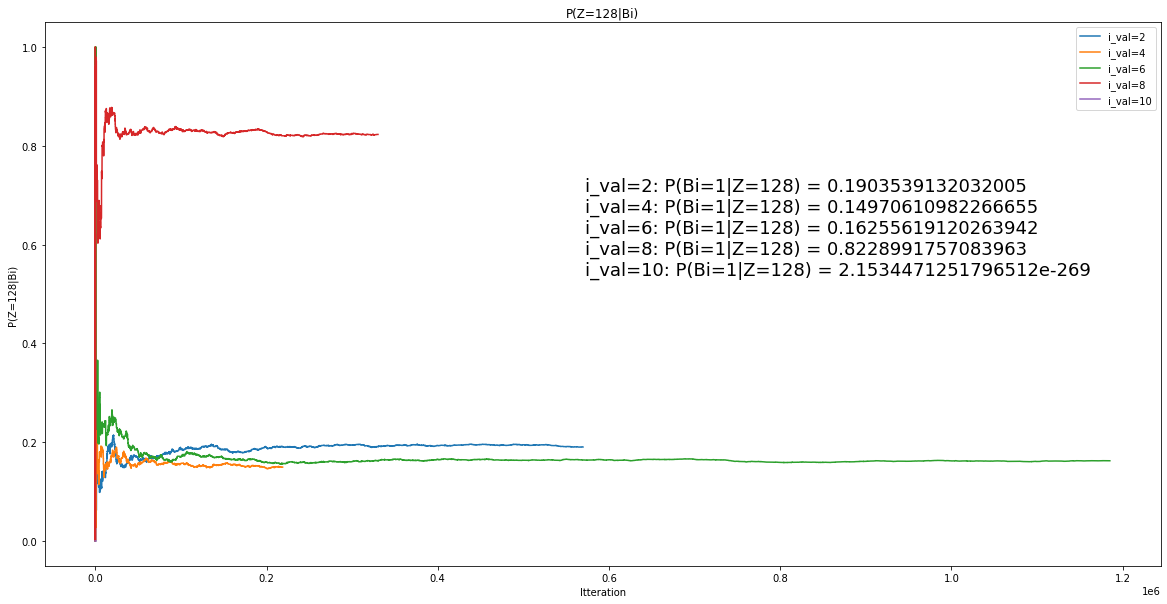

In [499]:
import matplotlib.pyplot as plt
fig  = plt.figure(figsize=(20, 10))
message = ""
for key in results.keys():
    plt.plot(results[key])
    message += f"{key}: P(Bi=1|Z=128) = {results[key][-1]}\n"
fig.text(.5, .5, message, fontsize=18)
plt.legend(results.keys())
plt.xlabel("Itteration")
plt.ylabel("P(Z=128|Bi)")
plt.title("P(Z=128|Bi)")